## 1. Get and inspect the data

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from skimpy import clean_columns

In [34]:
raw = pd.read_csv('superstore.csv', engine='python')
raw.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [35]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [36]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


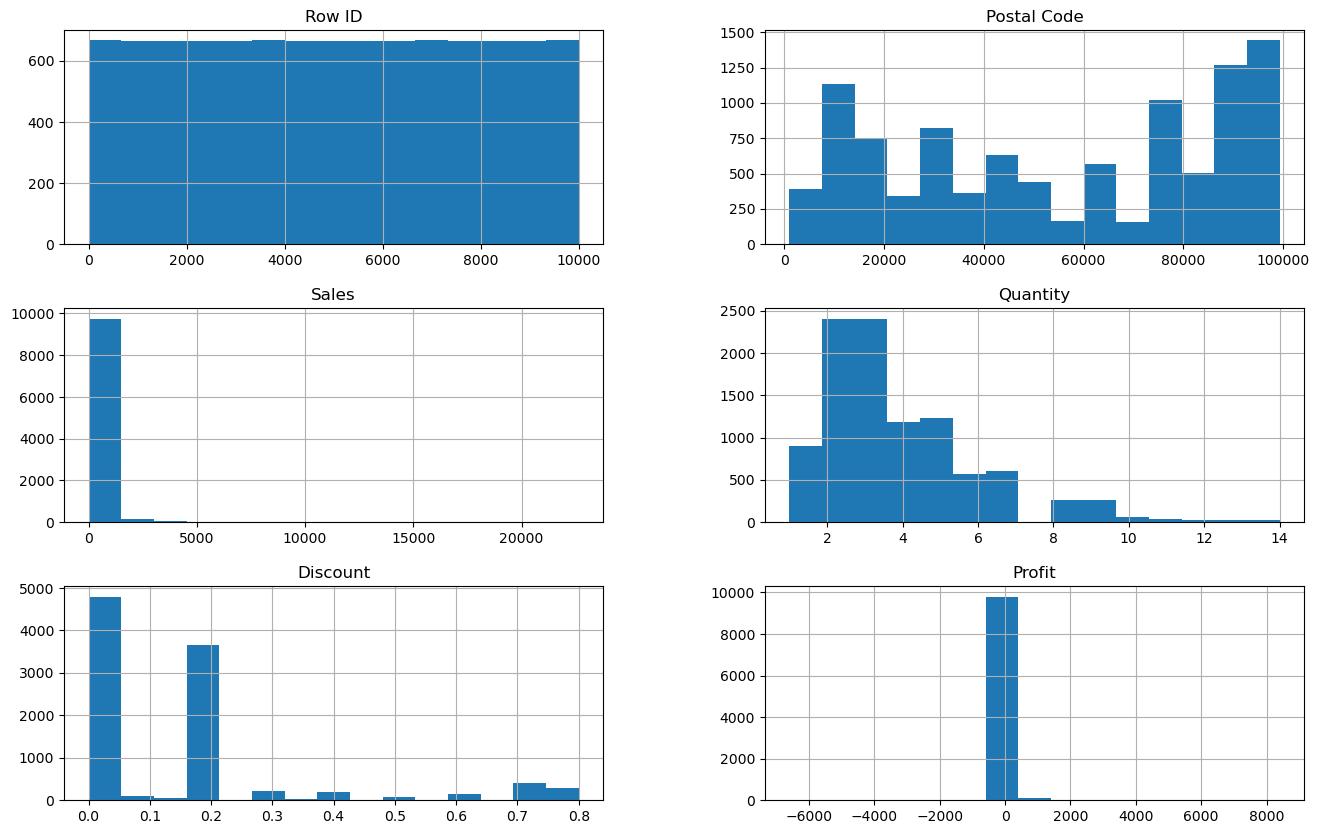

In [37]:
hist = raw.hist(bins=15, figsize=(16,10))

In [38]:
(raw
 .corr()
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


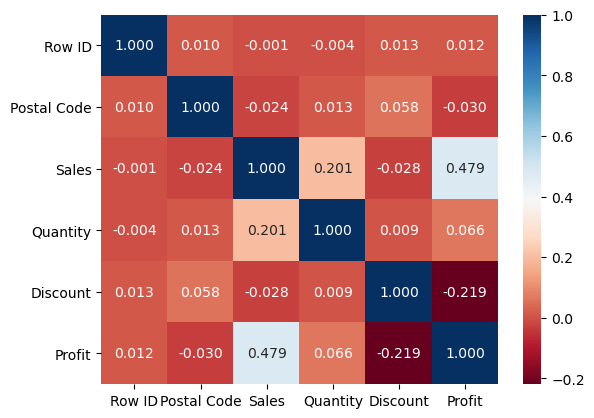

In [39]:
heatmap = sns.heatmap(raw.corr(), cmap='RdBu', annot=True, fmt=".3f")

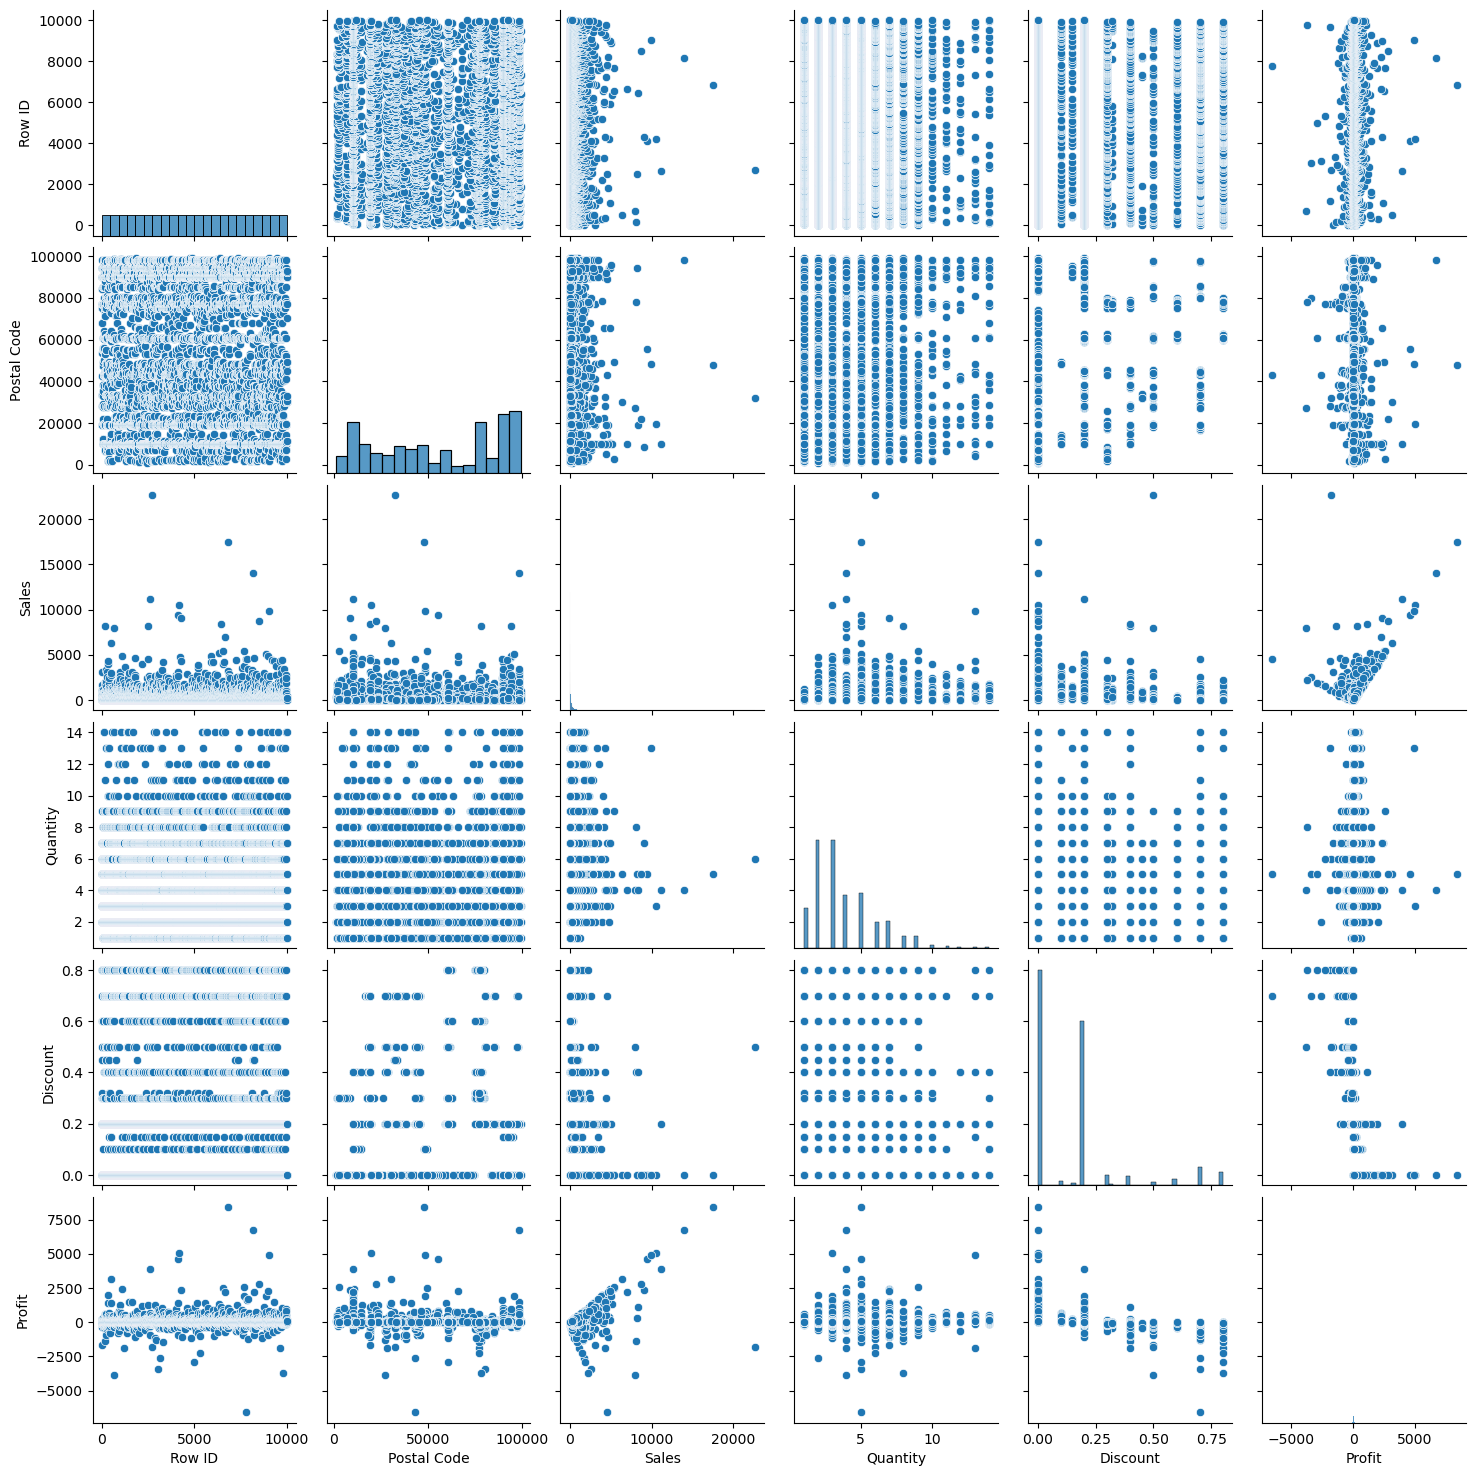

In [40]:
sns.pairplot(raw)

In [41]:
# Show outliers
raw['Sales'].nlargest(8)

2697    22638.480
6826    17499.950
8153    13999.960
2623    11199.968
4190    10499.970
9039     9892.740
4098     9449.950
4277     9099.930
Name: Sales, dtype: float64

## 2. Clean the data to get usefull info

In [42]:
df = raw.pipe(clean_columns).sort_values(by='order_date').reset_index()
df = df.assign(order_date=lambda df_: pd.to_datetime(df_.order_date))

df['month_num'] = df['order_date'].dt.month
df['month'] = df['order_date'].dt.month_name(locale='English')
df['year'] = df['order_date'].dt.year

df = df[['month_num', 'month', 'year','ship_mode', 'segment', 'country', 'city',
       'state', 'category', 'sub_category', 'sales', 'quantity', 'discount',
       'profit']]

21 column names have been cleaned

In [43]:
df

,month_num,month,year,ship_mode,segment,country,city,state,category,sub_category,sales,quantity,discount,profit
0,1,January,2017,Standard Class,Consumer,United States,Huntsville,Texas,Office Supplies,Binders,13.748,14,0.8,-22.6842
1,1,January,2017,Standard Class,Consumer,United States,Lorain,Ohio,Furniture,Furnishings,48.896,4,0.2,8.5568
2,1,January,2017,Standard Class,Consumer,United States,Huntsville,Texas,Office Supplies,Appliances,15.224,2,0.8,-38.8212
3,1,January,2017,Standard Class,Consumer,United States,Huntsville,Texas,Office Supplies,Binders,6.470,5,0.8,-9.7050
4,1,January,2017,Standard Class,Consumer,United States,Huntsville,Texas,Furniture,Chairs,310.744,4,0.3,-26.6352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9,September,2017,Standard Class,Corporate,United States,Portland,Oregon,Office Supplies,Paper,31.104,6,0.2,11.2752
9990,9,September,2017,Standard Class,Consumer,United States,Glendale,Arizona,Office Supplies,Paper,6.368,2,0.2,2.3880
9991,9,September,2017,Standard Class,Corporate,United States,Plano,Texas,Office Supplies,Labels,9.856,4,0.2,3.4496
9992,9,September,2017,First Class,Consumer,United States,Toledo,Ohio,Office Supplies,Labels,17.712,6,0.2,5.9778


## 3. Save final dataset

In [17]:
df.to_csv('salesdata.csv', index=False)

In [44]:
df.to_excel('salesdata.xlsx', index=False)

In [52]:
(df[(df['state'] == 'California') & (df['year'] == 2017) & (df['segment'] == 'Consumer')]
 .groupby('city')['quantity']
 .sum()
 .nlargest(5)
)

city
Los Angeles      485
San Francisco    409
San Diego         57
Fresno            50
Westminster       50
Name: quantity, dtype: int64